In [66]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from keras import utils 

In [3]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [4]:
tf.__version__

'2.17.0'

In [5]:
tf.test.is_built_with_cuda()

False

In [8]:
(X_train,y_train) ,(X_test,y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 92s 1us/step


In [10]:
X_train.shape

(50000, 32, 32, 3)

In [11]:
y_train.shape

(50000, 1)

In [25]:
def plot_sample(index):
    plt.figure(figsize=(10,1))
    plt.imshow(X_train[index])

In [19]:
def plot_sample(index):
    plt.figure(figsize=(4, 4))  # Better aspect ratio for image display
    plt.imshow(X_train[index])  # Show the image
    plt.axis('off')             # Hide the axis
    plt.show()                  # Ensure the plot is rendered

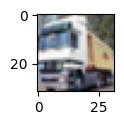

In [26]:
plot_sample(1)

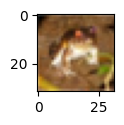

In [27]:
plot_sample(0)

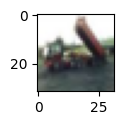

In [29]:
plot_sample(2)

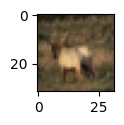

In [30]:
plot_sample(3)

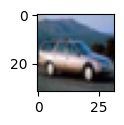

In [31]:
plot_sample(4)

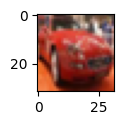

In [32]:
plot_sample(5)

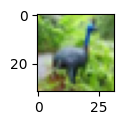

In [33]:
plot_sample(6)

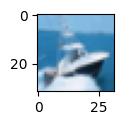

In [34]:
plot_sample(8)

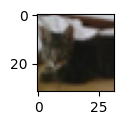

In [35]:
plot_sample(9)

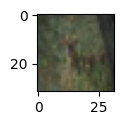

In [36]:
plot_sample(10)

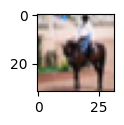

In [37]:
plot_sample(11)

In [41]:
print(y_train[:10])

[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]


In [42]:

classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [44]:
class_name = classes[y_train[3][0]]
class_name # This would access classes[2] = classes[y_train[3][0]]  # This would access classes[2]

'deer'

In [45]:
# Assuming y_train and classes are defined
index = 3  # We want to check the label at index 3
label = y_train[index][0]  # Get the label for the image at index 3
class_name = classes[label]  # Map the label to the class name

print(f"Label: {label}, Class Name: {class_name}")

Label: 4, Class Name: deer


In [47]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255 # Reshape for 2D input

In [58]:
y_train_categorical = keras.utils.to_categorical(y_train)
y_train_categorical.astype(dtype='float32')

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [60]:
y_test_categorical = keras.utils.to_categorical(y_train)
y_test_categorical.astype(dtype='float32')

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [62]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [64]:
y_train_categorical[0:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [70]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(optimizer='SGD',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
model.fit(X_train_scaled, y_train_categorical, epochs=1)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.3057 - loss: 1.9306


In [75]:
np.argmax(model.predict(X_test_scaled)[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


3

In [71]:
y_test[0]

array([3], dtype=uint8)

In [74]:
y_test_categorical[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [78]:
np.argmax(model.predict(X_test_scaled)[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


9

In [79]:
y_test[1]

array([8], dtype=uint8)

In [80]:
y_test_categorical[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [82]:
model.predict(X_test_scaled)[5] 

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


array([0.15463836, 0.41499949, 0.67856634, 0.7795856 , 0.58250433,
       0.75214744, 0.8971447 , 0.64216626, 0.03392396, 0.44545302],
      dtype=float32)

In [83]:
y_test[5]

array([6], dtype=uint8)

In [85]:
def get_model():
    model = keras.Sequential([
            keras.layers.Flatten(input_shape=(32,32,3)),
            keras.layers.Dense(3000, activation='relu'),
            keras.layers.Dense(1000, activation='relu'),
            keras.layers.Dense(10, activation='sigmoid')    
        ])

    model.compile(optimizer='SGD',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [88]:
%%timeit -n1 -r1 
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.3039 - loss: 1.9287
26.3 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [87]:
%%timeit -n1 -r1 
with tf.device('/GPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.3103 - loss: 1.9268
26.4 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [89]:
%%timeit -n1 -r1 
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.3091 - loss: 1.9297
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.4225 - loss: 1.6399
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.4512 - loss: 1.5560
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.4769 - loss: 1.4865
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.4931 - loss: 1.4407
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.5110 - loss: 1.3991
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.5265 - loss: 1.3589
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.5343 - loss: 1.3226
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.5497 - loss: 1.2837
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.5606 - loss: 1.2571
4min 17s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
